# The minimizers of Motzkin polynomial

In [1]:
using DynamicPolynomials, MomentTools, Plots;
using JuMP, MosekTools; optimizer = optimizer_with_attributes(Mosek.Optimizer, "QUIET" => true);

We use Mosek solver for the convex optimization on SDP matrices.

In [2]:
X  = @polyvar x y
motz = x^4*y^2 + x^2*y^4 - 3x^2*y^2  + 1 

x⁴y² + x²y⁴ - 3x²y² + 1

This polynomial, known as Motzkin polynomial, is non-negative but not a sum of squares.

We construction a moment relaxation of order 6, imposing the moments to come from a probability measure, with total mass equal to 1:

In [3]:
M = MomentModel(X, 6, optimizer)
constraint_unitmass(M)
objective(M,motz)
v, M = optimize(M)

(-1.6742123696021906e-10, 
A Moment program with:
A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`Array{VariableRef,1}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Dual model with Mosek attached
Names registered in the model: basis, degree, dual, index, moments, monomials, nu, variables, y)

In [4]:
v

-1.6742123696021906e-10

The objective value is a lower bound of the actual mimimal value $0$ of Motzkin polynomial.

We extract a measure from the sequence of moments, using the function `MultivariateSeries.decompose`:

In [5]:
w, Xi = get_measure(M)

(Float64[], Array{Float64}(undef,2,0))

 `w` is the vector of weights and `Xi` is the matrix of points, that is support of the measure $\mu=\sum_i \omega_i \delta_{\Xi_i}$. `w[i]` is the weight of the Dirac measure corresponding to the point `Xi[:,i]` in this decomposition.

Here no point is found to approximate the optimal moment sequence.

Now, to find the minimizers, we add as constraints, that the gradient of the polynomial should vanish:

In [6]:
M = MomentModel(X, 6, optimizer)
constraint_unitmass(M)
objective(M,motz)

J = differentiate(motz,X)
constraint_zero(M, J...)
v = optimize(M)[1]

3.6962168659115946e-8

In [7]:
w, Xi = get_measure(M)

([0.24999999285784968, 0.24999998951340827, 0.24999998951340882, 0.24999999285784744], [1.000000001321389 1.0000000037394126 -1.0000000037394123 -1.000000001321389; -1.0000000111856049 1.0000000054769382 -1.0000000054769382 1.0000000111856049])

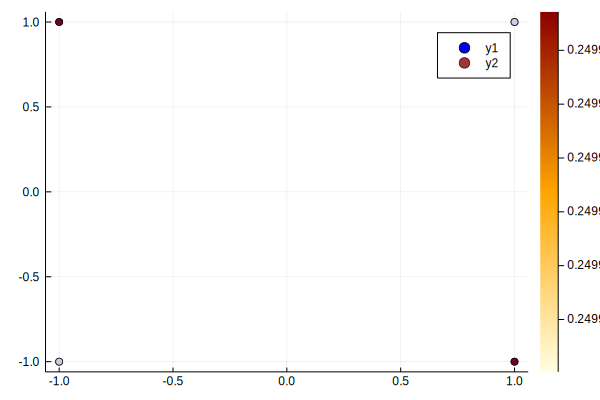

In [8]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)))

We find approximately the $4$ minimizers.


Finally, to find the minimizers, we try another strategy and add the constraint that the polynomial should vanish, since we know that its minimal value (at the minimizers) is $0$:

In [9]:
M = MomentModel(X, 6, optimizer)
constraint_unitmass(M)
objective(M,motz)

constraint_zero(M, motz)

v = optimize(M)[1]

2.3258039938411912e-10

In [10]:
w, Xi = get_measure(M)

([0.2500000086542787, 0.24999999055583366, 0.24999999055583705, 0.2500000086542783], [1.000000018788225 1.0000000188473943 -1.0000000188473939 -1.000000018788225; -1.0000000188728464 1.0000000189101361 -1.0000000189101361 1.0000000188728466])

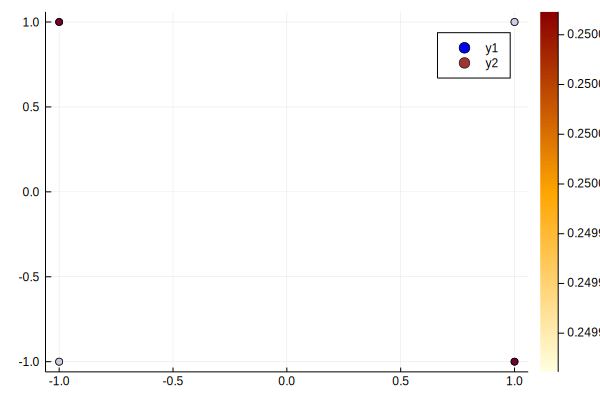

In [11]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)))

The minimizers (in red) are close to that actual minimizers (in blue).